In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
train=pd.read_csv(r"C:\Users\12dem\OneDrive\Desktop\Mtech_assignments\ML\test\Masters\bike_train.csv")  
test=pd.read_csv(r"C:\Users\12dem\OneDrive\Desktop\Mtech_assignments\ML\test\Masters\bike_test.csv")

**Q1-Examining dataset size, missing values, and feature types.**

In [3]:
#checking the datatypes of the features
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
#train,test data shape
print(train.shape)
print(test.shape)

(10450, 12)
(2613, 9)


In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2012-07-15 7:00:00,3,0,0,1,28.70000,33.335000,79,6.003200,17,30,47
1,2012-08-14 15:00:00,3,0,1,1,33.62000,37.880000,46,15.001300,84,199,283
2,2011-02-06 6:00:00,1,0,0,1,10.66000,12.880000,60,15.001300,0,1,1
3,2012-05-06 17:00:02,2,0,0,2,26.42506,30.566166,61,9.512288,198,330,531
4,2012-01-09 2:00:00,1,0,1,1,9.84000,12.120000,56,8.998100,2,3,5


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,05-06-2012 5:00,2,0,1,3,19.680000,23.48500,82,11.00140
1,19-03-2011 19:00,1,0,0,1,18.040000,21.97000,33,19.00120
2,02-04-2012 6:00,2,0,1,1,13.885038,16.24664,68,29.52646
3,13-07-2012 20:00,3,0,1,1,30.340000,33.33500,48,8.99810
4,09-11-2011 19:00,4,0,1,1,18.040000,21.97000,72,7.00150


## Preprossing

**Q4- Deriving the hour, weekday, month, season and encoding the categorical data**

In [7]:
#Ectracting the information from datetime feature
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'],dayfirst=True)


train['hour'] = train['datetime'].dt.hour
train['weekday'] = train['datetime'].dt.weekday
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year

test['hour'] = test['datetime'].dt.hour
test['weekday'] = test['datetime'].dt.weekday
test['month'] = test['datetime'].dt.month
test['year'] = test['datetime'].dt.year


In [8]:
#Type casting the datetime and numerical attributes to category

train['weather']=train.weather.astype('category')
train['season']=train.season.astype('category')
train['workingday']=train.workingday.astype('category')
train['holiday']=train.holiday.astype('category')
train['weekday']=train.weekday.astype('category')
train['month']=train.month.astype('category')
train['year']=train.year.astype('category')

test['weather']=test.weather.astype('category')
test['season']=test.season.astype('category')
test['workingday']=test.workingday.astype('category')
test['holiday']=test.holiday.astype('category')
test['weekday']=test.weekday.astype('category')
test['month']=test.month.astype('category')
test['year']=test.year.astype('category')


### Dropping Datetime

Dropping datetime cloumn as it is no longer necessary since we have extracted - hour, weekday, month, year from it.

In [9]:
train=train.drop(['datetime'],axis=1)

In [10]:
train.describe()

,temp,atemp,humidity,windspeed,casual,registered,count,hour
count,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000,10450.000000
mean,20.191700,23.605793,61.924211,12.765259,35.869091,154.511675,190.410526,11.515789
std,7.792683,8.478045,19.245193,8.102821,49.629436,150.861267,181.038755,6.939507
min,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.940000,16.665000,47.000000,7.001500,4.000000,35.000000,42.000000,6.000000
50%,20.500000,24.240000,62.000000,12.450050,16.000000,117.000000,143.000000,12.000000
75%,26.240000,31.060000,77.000000,16.997900,49.000000,221.000000,283.000000,18.000000
max,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000


In [11]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,weekday,month,year
0,2012-06-05 05:00:00,2,0,1,3,19.680000,23.48500,82,11.00140,5,1,6,2012
1,2011-03-19 19:00:00,1,0,0,1,18.040000,21.97000,33,19.00120,19,5,3,2011
2,2012-04-02 06:00:00,2,0,1,1,13.885038,16.24664,68,29.52646,6,0,4,2012
3,2012-07-13 20:00:00,3,0,1,1,30.340000,33.33500,48,8.99810,20,4,7,2012
4,2011-11-09 19:00:00,4,0,1,1,18.040000,21.97000,72,7.00150,19,2,11,2011


In [12]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,month,year
0,3,0,0,1,28.70000,33.335000,79,6.003200,17,30,47,7,6,7,2012
1,3,0,1,1,33.62000,37.880000,46,15.001300,84,199,283,15,1,8,2012
2,1,0,0,1,10.66000,12.880000,60,15.001300,0,1,1,6,6,2,2011
3,2,0,0,2,26.42506,30.566166,61,9.512288,198,330,531,17,6,5,2012
4,1,0,1,1,9.84000,12.120000,56,8.998100,2,3,5,2,0,1,2012


In [13]:
#checking for any null values
print(train.isnull().sum())



season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
weekday       0
month         0
year          0
dtype: int64


In [14]:
print(test.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
hour          0
weekday       0
month         0
year          0
dtype: int64


## EDA - ploting graphs for different features


**Q2- Visualizing the data key features relation with target variable.**

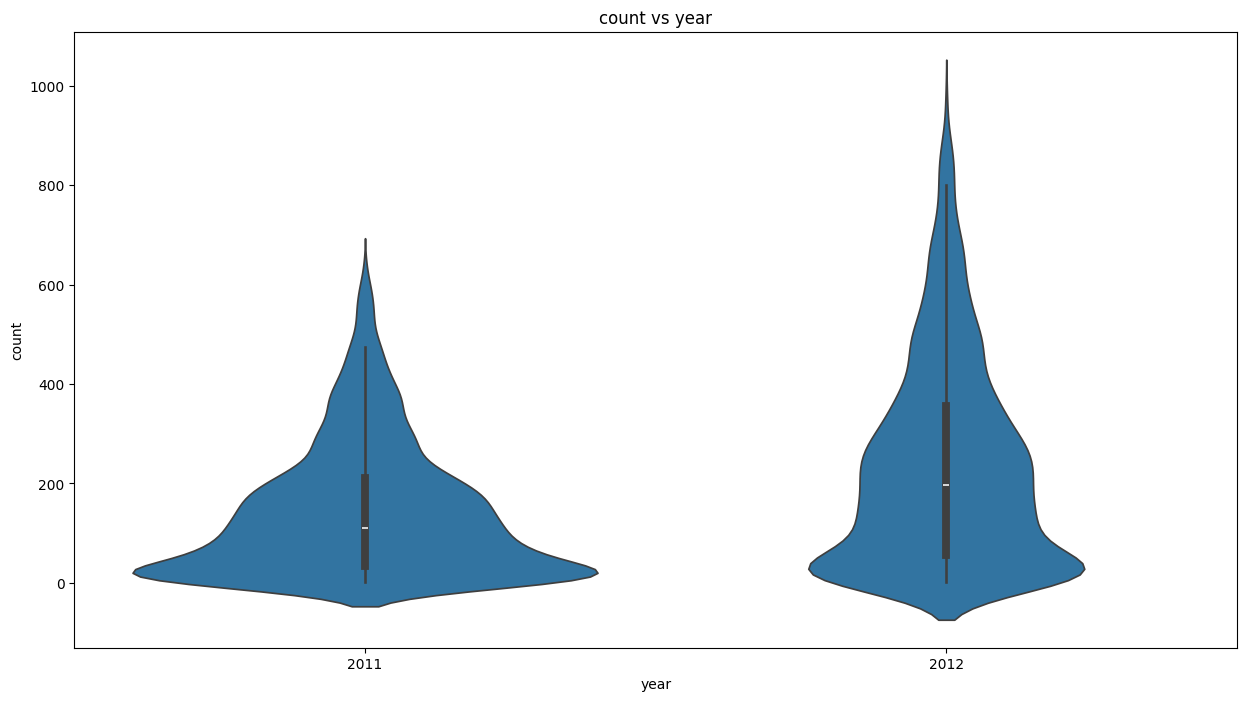

In [15]:
#A Violinplot for the year feature to understand the distribution of count
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots(figsize=(15,8))
sns.violinplot(x='year',y='count',data=train[['year','count']])
ax.set_title('count vs year')
plt.show()

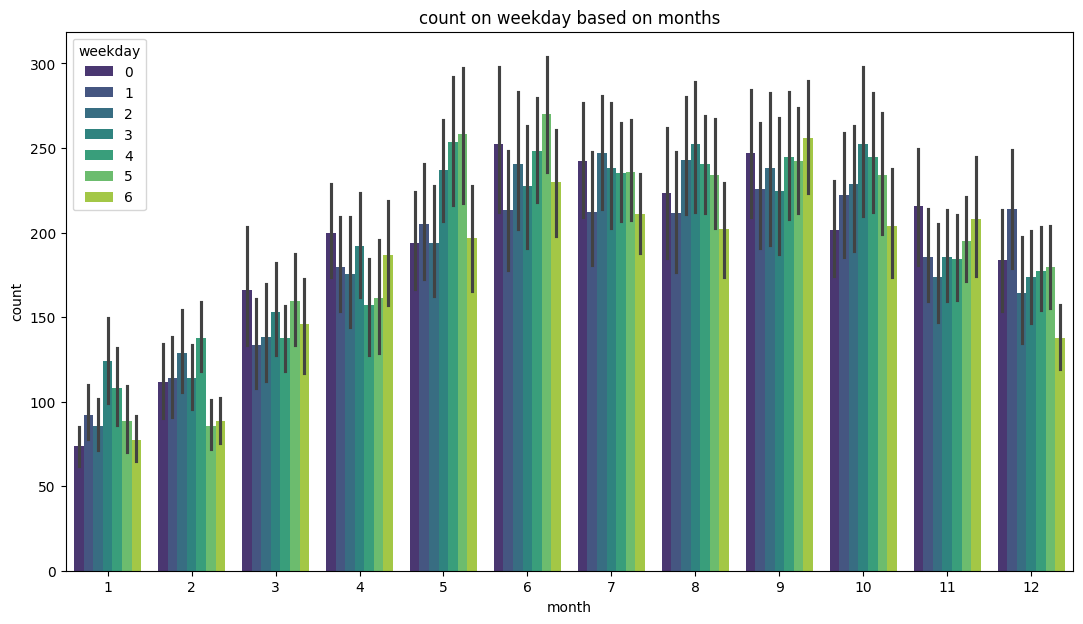

In [16]:
#A Barplot for checking the highest count for weekdays in each months
fig,ax1=plt.subplots(figsize=(13,7))
sns.barplot(x='month',y='count',data=train[['weekday','month','count']],hue='weekday',ax=ax1,palette='viridis')
ax1.set_title('count on weekday based on months')
plt.show()

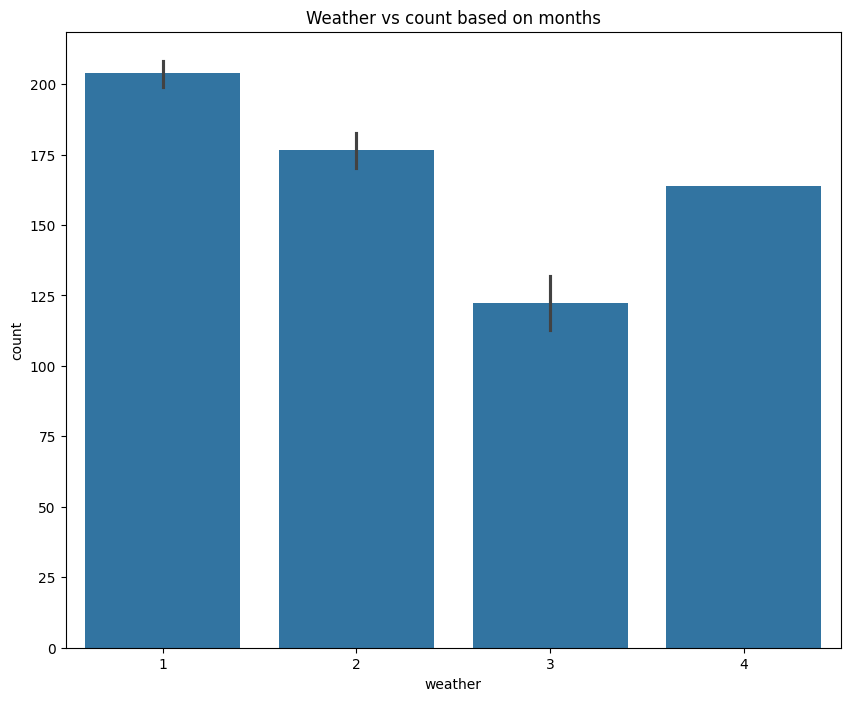

In [17]:
#A Barplot for measuring the count in respect to weather based on count
fig,ax1=plt.subplots(figsize=(10,8))
sns.barplot(x='weather',y='count',data=train[['count','month','weather']],ax=ax1)
ax1.set_title('Weather vs count based on months')
plt.show()

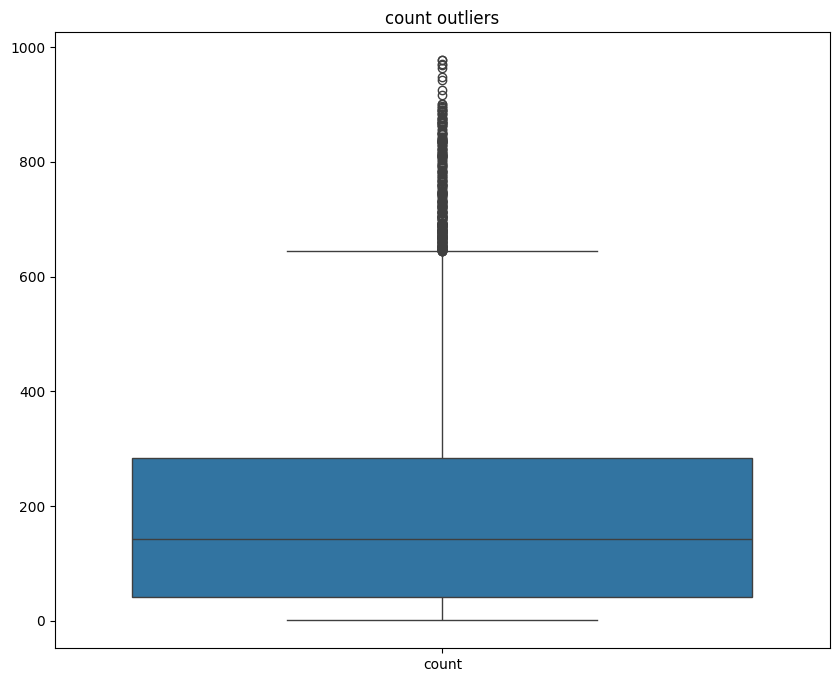

In [18]:
#A Boxplot for count outliers
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=train[['count']])
ax.set_title('count outliers')
plt.show()

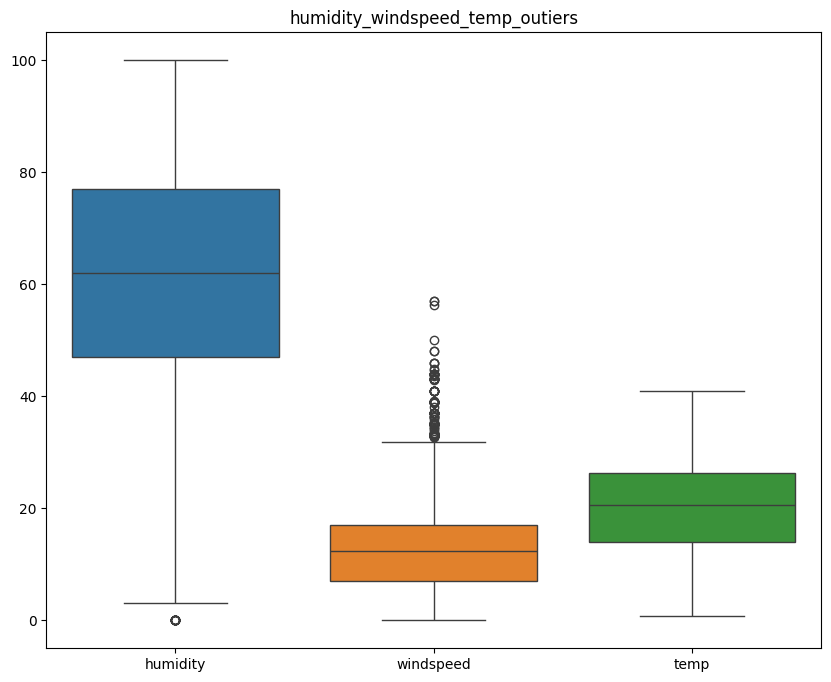

In [19]:
#Box plot for the numerical features to find outliers
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=train[['humidity','windspeed','temp']])
ax.set_title('humidity_windspeed_temp_outiers')
plt.show()

It seems there are outliers present in both humidity and windspeed feature and no outliers in temp feature.

In [20]:
#writing a custom function to remove the outliers (1.5*IQR)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return cleaned_df



In [21]:
#Removing outliers from humidity and windspeed
train = remove_outliers_iqr(train, 'humidity')
train = remove_outliers_iqr(train, 'windspeed')


In [22]:
train.describe()

,temp,atemp,humidity,windspeed,casual,registered,count,hour
count,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000
mean,20.234489,23.667928,62.354268,12.297339,35.879762,154.551182,190.460735,11.465325
std,7.791476,8.451630,18.902587,7.429737,49.650875,150.841038,181.048231,6.961379
min,0.820000,0.760000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.940000,16.665000,47.000000,7.001500,4.000000,35.000000,42.000000,5.000000
50%,20.500000,24.240000,62.000000,11.212982,16.000000,117.000000,143.000000,11.000000
75%,26.240000,31.060000,78.000000,16.997900,48.000000,222.000000,283.000000,18.000000
max,41.000000,45.455000,100.000000,31.868561,367.000000,886.000000,977.000000,23.000000


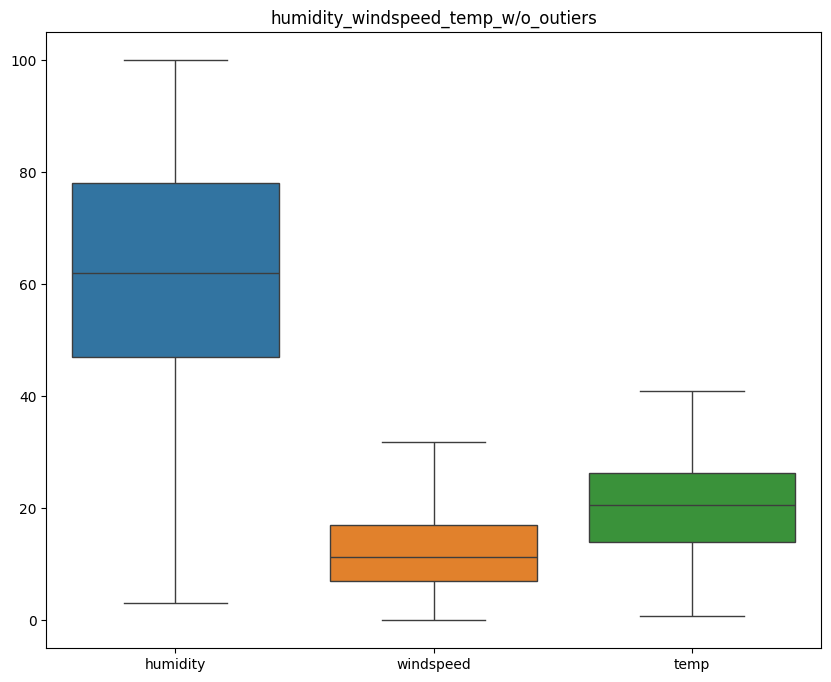

In [23]:
#ploting the humidity, windspeed, temp without outliers
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=train[['humidity','windspeed','temp']])
ax.set_title('humidity_windspeed_temp_w/o_outiers')
plt.show()

<Axes: >

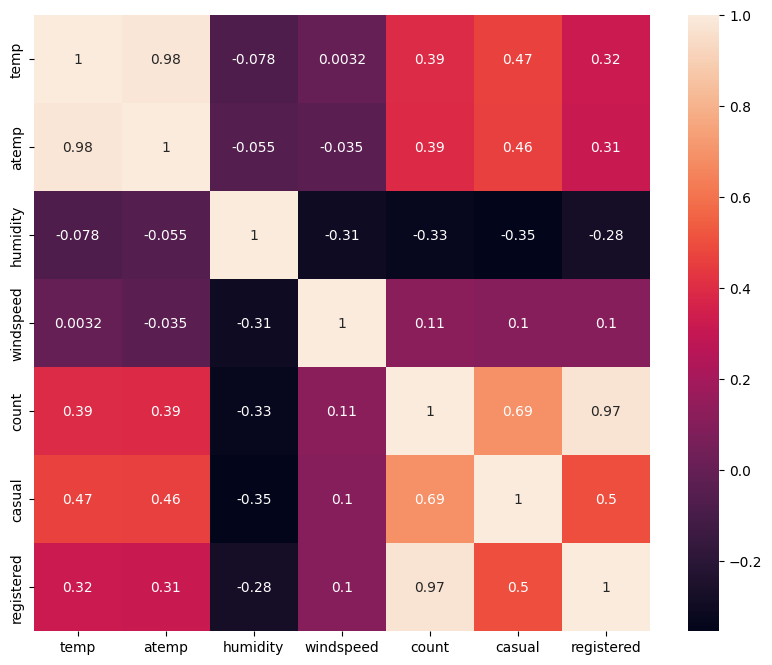

In [24]:
#correlation matrix of all features
fig,ax=plt.subplots(figsize=(10,8))
coore_mat=train[['temp','atemp','humidity','windspeed','count','casual','registered']].corr()
sns.heatmap(coore_mat, vmax=1, square=True, annot=True,ax=ax)


In [25]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,month,year
0,3,0,0,1,28.70000,33.335000,79,6.003200,17,30,47,7,6,7,2012
1,3,0,1,1,33.62000,37.880000,46,15.001300,84,199,283,15,1,8,2012
2,1,0,0,1,10.66000,12.880000,60,15.001300,0,1,1,6,6,2,2011
3,2,0,0,2,26.42506,30.566166,61,9.512288,198,330,531,17,6,5,2012
4,1,0,1,1,9.84000,12.120000,56,8.998100,2,3,5,2,0,1,2012


**Q3- Suggesting the most informative features**

It seems the most informative features are : season, month, year, holiday, workingday, weekday, weather, temp, humidity, windspeed

## Training and tesing the different models(linear, Ridge, Lasso regressions)

**Q5- Spliting data into training and validation sets and building a simple Linear Regression model.**

In [26]:
#dropping casual and registered features as they indirectly give the count value and the model may cheat.
from sklearn.model_selection import train_test_split
# X_train=train.drop(['count','casual','registered'],axis=1)
# Y_train=train['count']

X_train, X_test, Y_train, Y_test = train_test_split(train.drop(['count','casual','registered'],axis=1),train['count'], test_size=0.25, random_state=42)

Adding reset of indexes as getting error when declaring Y_train

In [27]:
#Reseting train index values
X_train.reset_index(drop=True, inplace=True)
Y_train = Y_train.reset_index(drop=True)

# Reseting test index values
X_test.reset_index(drop=True, inplace=True)
Y_test = Y_test.reset_index(drop=True)

In [28]:
#checking the shapes of ytrain and ytest
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape
print(Y_train.head())
print(Y_test.head())

0     36
1    282
2      1
3      4
4     57
Name: count, dtype: int64
0     96
1    602
2    174
3    364
4    512
Name: count, dtype: int64


Spliting the features into categorical and numerical features

In [29]:
train_features=X_train[['season', 'month','year','holiday', 'workingday', 'weekday','weather', 'temp', 'humidity', 'windspeed']]

test_features=X_test[['season', 'month','year','holiday', 'workingday', 'weekday','weather', 'temp', 'humidity', 'windspeed']]

#categorical features grouped together
categorical_features=['season','year','holiday', 'workingday','weather']

#numerical features grouped together
numerical_features=['month','weekday','temp', 'humidity', 'windspeed']


Encoding the categorical features

In [30]:
traintrain_enc_fts=pd.get_dummies(train_features,columns=categorical_features) #using one hot encoding for categorical features
print(traintrain_enc_fts.shape)


(7678, 19)


In [31]:
X_train=traintrain_enc_fts
Y_train=Y_train.values #used count values to convert to array as it was giving error in model training

**Linear regression model**

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg_model=LinearRegression()
lin_reg_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
lin_reg_model.fit(X_train,Y_train)
lin_reg=lin_reg_model.score(X_train,Y_train)


In [34]:
#Cross validation prediction
from sklearn.model_selection import cross_val_score,cross_val_predict

lr_predict=cross_val_predict(lin_reg_model,X_train,Y_train,cv=5)
lr_predict

array([ 63.4656835 , 361.94527197,  42.11171656, ..., 230.1149933 ,
       203.29725799, 226.86136737], shape=(7678,))

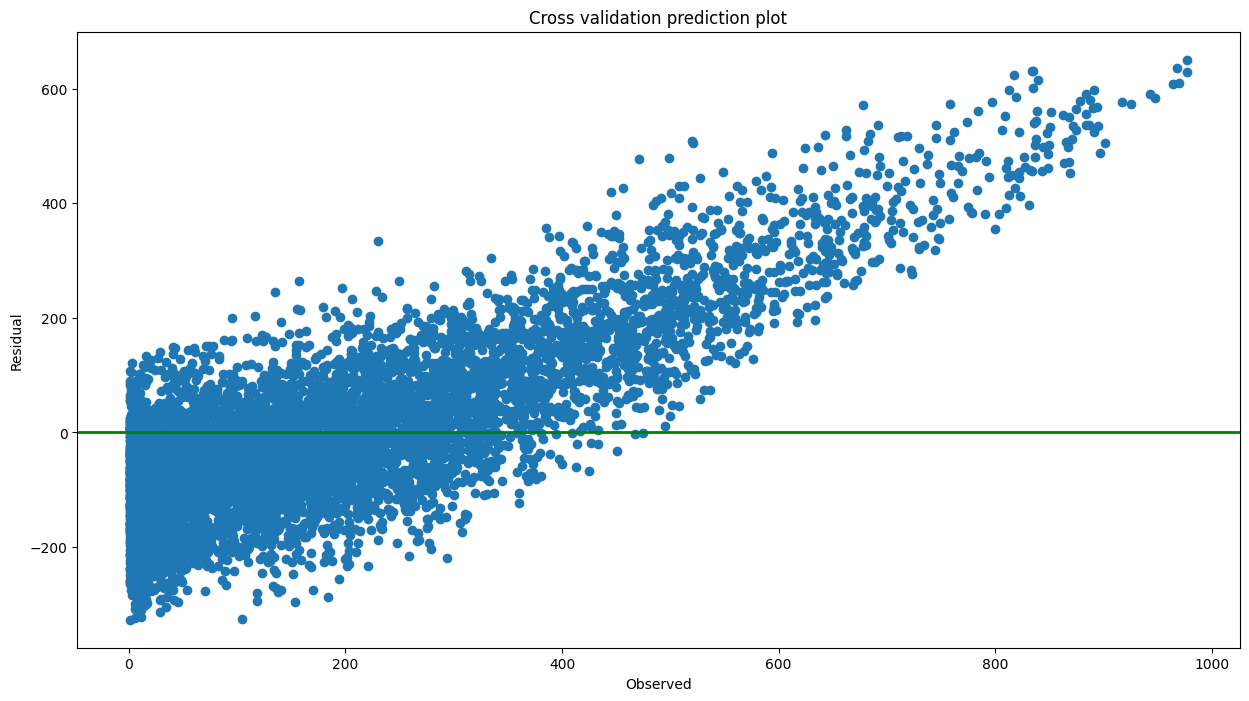

In [35]:
#Cross validation plot
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(Y_train,Y_train-lr_predict)
ax.axhline(lw=2,color='green')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [36]:
test_enc_fts = pd.get_dummies(test_features,columns=categorical_features)
test_enc_fts.shape

(2560, 19)

In [37]:
X_test=test_enc_fts
Y_test=Y_test.values

In [38]:
lr_predict_test=lin_reg_model.predict(X_test)
lr_predict_test

array([200.95313868, 329.03570577, 317.72573924, ...,  45.93710646,
        11.68781862, 236.36351305], shape=(2560,))

In [39]:
import numpy as np

def rmsle(y_true, y_pred):
    y_pred = np.maximum(0, y_pred)
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))


In [40]:
print("Linear Regression RMSLE:", rmsle(Y_test, lr_predict_test))

Linear Regression RMSLE: 1.449170301495725


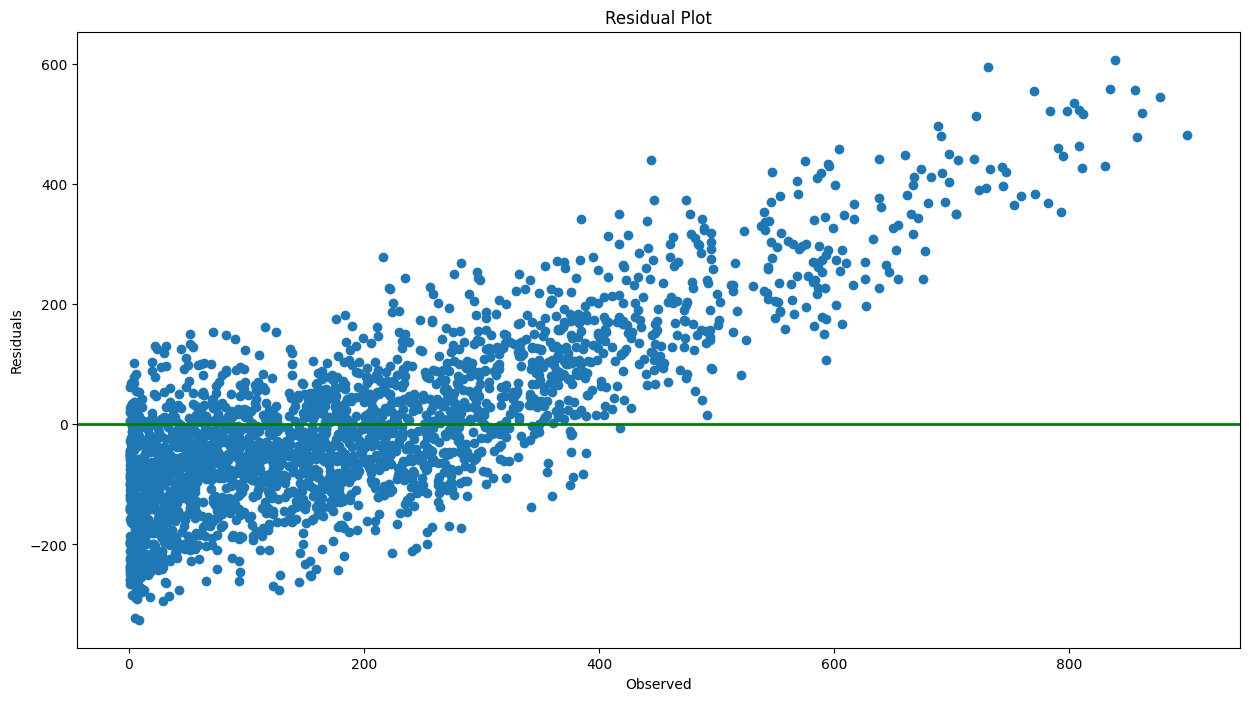

In [41]:
#Residual plot
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(Y_test, Y_test-lr_predict_test)
ax.axhline(lw=2,color='green')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

**Q6- Polynomial transformations and Trying Ridge regression and Lasso regression on the data and tuning the regularization(aplha)**

**Generating the polynomial features of degree 2 and training it on train and test data**

In [42]:
#Generating the polynomial features of degree 2 and training it on train and test data
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.transform(X_test)

**Ridge Regression**

In [43]:
#Intinalizing the ridge regression model and finetuning the aplha value
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_model = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

In [44]:
#make_scorer is a sklearn function which makes scores accoding to the metic or loss function
from sklearn.metrics import make_scorer
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring=rmsle_scorer)
grid_search.fit(poly_X_train, Y_train)


,estimator,Ridge()
,param_grid,"{'alpha': [0.01, 0.1, ...]}"
,scoring,make_scorer(r...hod='predict')
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [45]:
#finding and finetuning the best aplha(regularization parameter)
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha found: {best_alpha}")

Best alpha found: 0.01


In [46]:
#Fitting the best ridge model of alpha to the ridge model
final_ridge_model = Ridge(alpha=best_alpha)
final_ridge_model.fit(poly_X_train, Y_train)
print(f"Final Ridge model trained with alpha = {best_alpha}")

Final Ridge model trained with alpha = 0.01


In [47]:
#predictions made by ridge model
ridge_predictions = final_ridge_model.predict(poly_X_test)

In [48]:
#RMSLE of ridge model
ridge_rmsle = rmsle(Y_test, ridge_predictions)
print(f"Ridge Regression RMSLE: {ridge_rmsle}")

Ridge Regression RMSLE: 1.3349885410777234


**Lasso Regression**

In [49]:
#initializing the lasso regression model and finding the best alpha value using the same process as redge regression
from sklearn.linear_model import Lasso
lasso_model = Lasso()
param_lasso = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
lasso = GridSearchCV(lasso_model, param_lasso, cv=5, scoring=rmsle_scorer)
lasso.fit(poly_X_train, Y_train)


c:\Users\12dem\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.231e+07, tolerance: 2.078e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\12dem\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.116e+07, tolerance: 2.027e+04
  model = cd_fast.enet_coordinate_descent(
c:\Users\12dem\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

,estimator,Lasso()
,param_grid,"{'alpha': [0.001, 0.01, ...]}"
,scoring,make_scorer(r...hod='predict')
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,10.0


In [50]:
#Finding and finetuning the best aplha(regularization parameter) for lasso
best_alpha_lasso = lasso.best_params_['alpha']
print(f"Best alpha found for Lasso: {best_alpha_lasso}")
final_lasso_model = Lasso(alpha=best_alpha_lasso)
final_lasso_model.fit(poly_X_train, Y_train)

Best alpha found for Lasso: 10.0


,alpha,10.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [51]:
#Lasso model predictions and RMSLE calculation
lasso_predictions = final_lasso_model.predict(poly_X_test)
lasso_rmsle = rmsle(Y_test, lasso_predictions)

**Q7 - Summarizing the results of all the models**

**Comparing the rmsle of all the models used**


In [52]:
import pandas as pd

model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'RMSLE': [rmsle(Y_test, lr_predict_test), ridge_rmsle, lasso_rmsle]
})

print("Model RMSLE Comparison:")
print(model_comparison)

Model RMSLE Comparison:
               Model     RMSLE
0  Linear Regression  1.449170
1   Ridge Regression  1.334989
2   Lasso Regression  1.335004


### Observations:

Based on the RMSLE results across the three models:

*  **Linear Regression:** recorded the highest RMSLE value of 1.449, indicating the weakest performance among the compared models. This suggests that the basic linear model struggles to capture the underlying patterns in the data.

* **Ridge Regression:** achieved a noticeably lower RMSLE of 1.3350, showing a clear improvement over standard Linear Regression. The addition of **L2 regularization** helps control model complexity and reduces overfitting, resulting in better predictive performance.

* **Lasso Regression:** performed almost identically to Ridge Regression, also reaching an RMSLE of 1.3350. This indicates that **L1 regularization** is equally effective for this problem. The minimal difference between Ridge and Lasso suggests that both regularization techniques help stabilize the model and improve generalization compared to plain Linear Regression.

## Finding the best performing model

In [53]:
#Custom variables for finding the best modelname and rmsle value
best_model_name = model_comparison.loc[model_comparison['RMSLE'].idxmin(), 'Model']
#The loc is a label-based indexing and idxmin() returns the index of the minimum value in the 'RMSLE' column.
best_rmsle = model_comparison['RMSLE'].min()
#The min() function returns the minimum value from the 'RMSLE' column(this is different from the above where we are takeing the reference of the mdoel to get the model name).

print(f"The best performing model is: {best_model_name} with an RMSLE of {best_rmsle:.4f}")
#Just prininting the best model name and its rmsle value

The best performing model is: Ridge Regression with an RMSLE of 1.3350


In [54]:
#An if-else block to select the best model predictions based on the best model name
if best_model_name == 'Linear Regression':
    best_model_predictions = lr_predict_test
elif best_model_name == 'Ridge Regression':
    best_model_predictions = ridge_predictions
elif best_model_name == 'Lasso Regression':
    best_model_predictions = lasso_predictions



In this senario Ridge Regression is selected as the best model

**Q8- Plotting the residual for the best model**

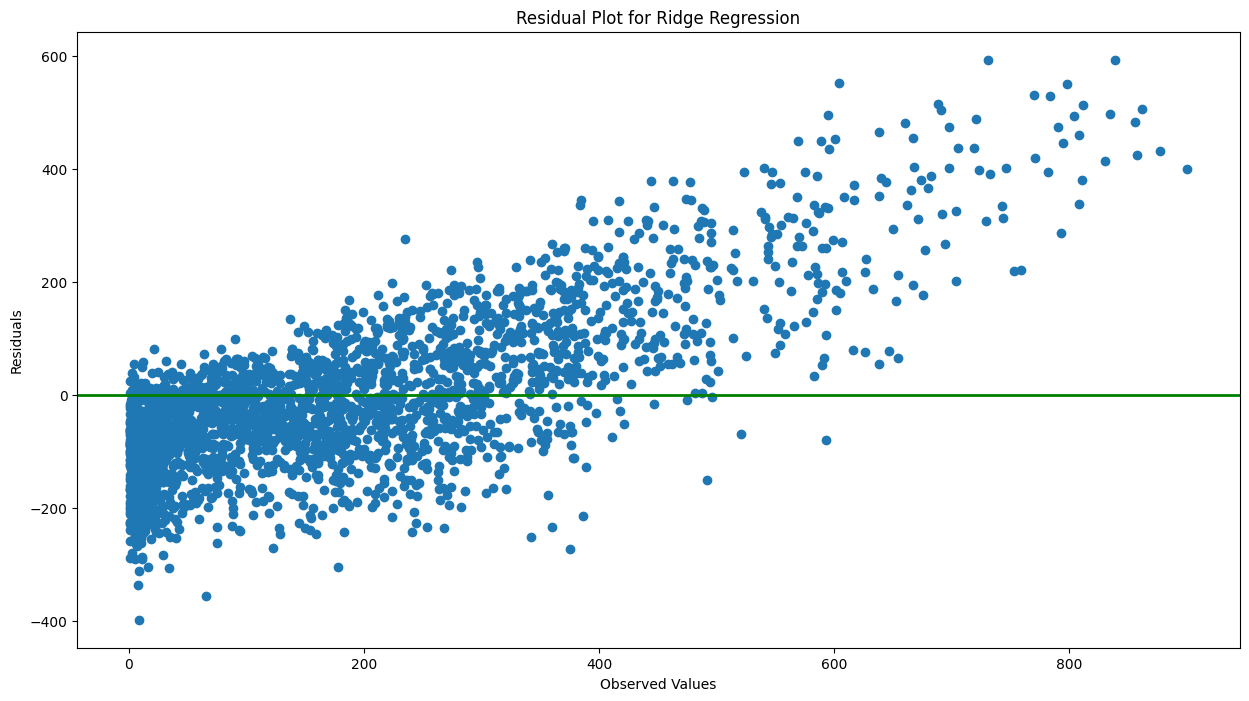

In [55]:
import matplotlib.pyplot as plt

#Residual plot for the best model
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(Y_test, Y_test - best_model_predictions)
ax.axhline(lw=2, color='green')
ax.set_xlabel('Observed Values')
ax.set_ylabel('Residuals')
ax.set_title(f'Residual Plot for {best_model_name}')
plt.show()

**Q9 - Why is the winning model performing better than others**

 **Which model performed the best and why?**

Ridge Regression delivered the best performance, although the improvement over Lasso Regression was minimal. 

Ridge achieved an RMSLE of 1.334989, while Lasso recorded an RMSLE of 1.335004, and both models significantly outperformed the baseline Linear Regression model, which had an RMSLE of 1.449170.

The key reason behind the improved performance of Ridge and Lasso is the introduction of regularization— regularization in Ridge and regularization in Lasso. These techniques help address overfitting, especially when working with expanded feature sets such as polynomial features. By penalizing large coefficients, they encourage more stable models that generalize better to unseen data. 

In this case, Ridge Regression had a slightly lower RMSLE, making it the best-performing model overall.

## EXTRA: Aditional model to mke the predictions better(XGBoost, RandomForest)

In [56]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [57]:
from xgboost import XGBRegressor

# Initialzing XGBRegressor 
xgb_model = XGBRegressor()

# Training the model
xgb_model.fit(poly_X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [58]:
xgb_predictions = xgb_model.predict(poly_X_test)
xgb_rmsle = rmsle(Y_test, xgb_predictions)
print(f"XGBoost Regressor RMSLE: {xgb_rmsle}")

XGBoost Regressor RMSLE: 1.2268325257863888


**RandomForest Model**

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Initializing RandomForestRegressor 
rf_model = RandomForestRegressor(random_state=42)

# Training the model
rf_model.fit(poly_X_train, Y_train)

# Making predictions on the test set
rf_predictions = rf_model.predict(poly_X_test)

# Calculating RMSLE for RandomForest Regressor
rf_rmsle = rmsle(Y_test, rf_predictions)
print(f"RandomForest Regressor RMSLE: {rf_rmsle}")

RandomForest Regressor RMSLE: 1.1792354598710995


In [60]:
new_models = pd.DataFrame({
    'Model': ['XGBoost Regressor', 'RandomForest Regressor'],
    'RMSLE': [xgb_rmsle, rf_rmsle]
})

model_comparison = pd.concat([model_comparison, new_models], ignore_index=True)

print("Updated Model RMSLE Comparison:")
print(model_comparison)

Updated Model RMSLE Comparison:
                    Model     RMSLE
0       Linear Regression  1.449170
1        Ridge Regression  1.334989
2        Lasso Regression  1.335004
3       XGBoost Regressor  1.226833
4  RandomForest Regressor  1.179235


## Test.csv predictions


In [61]:
test_data_features = test[['season', 'month','year','holiday', 'workingday', 'weekday','weather', 'temp', 'humidity', 'windspeed']]

In [62]:
test_data_enc = pd.get_dummies(test_data_features, columns=categorical_features)
test_data_enc = test_data_enc.reindex(columns=X_train.columns, fill_value=0)


In [63]:
poly_test_data = poly.transform(test_data_enc)
final_predictions = rf_model.predict(poly_test_data)
final_predictions = np.maximum(0, final_predictions)

print("Sample predictions:", final_predictions[:10])

Sample predictions: [ 70.96       141.29416667 272.83666667 346.20166667 228.49
 177.53       255.46166667  74.2252381  261.79       356.77      ]


## Updating the predictions to the submission.csv file

In [ ]:
submission = pd.read_csv("Submission.csv")

# Replacing count_predicted column with the predicted values
submission["count_predicted"] = final_predictions

# Saving the submission file 
submission.to_csv("Submission.csv", index=False)

In [65]:
print(len(submission), len(final_predictions))


2613 2613


In [66]:
print(submission.head())
print(final_predictions[:5])


           datetime  Count_Predicted  count_predicted
0   05-06-2012 5:00              NaN        70.960000
1  19-03-2011 19:00              NaN       141.294167
2   02-04-2012 6:00              NaN       272.836667
3  13-07-2012 20:00              NaN       346.201667
4  09-11-2011 19:00              NaN       228.490000
[ 70.96       141.29416667 272.83666667 346.20166667 228.49      ]


**Q10. Why does RMSLE penalize under-predictions more gently than RMSE?**

RMSLE uses the log of actual and predicted values, while RMSE uses raw values. 

Because of the log transformation, Large over-predictions cause large differences in log(y_pred) vs. log(y_true) therfore incur a big penalty and Under-predictions shrink when log-transformed therfore incur a smaller penalty.

**Q11. What are the trade-offs between model simplicity and predictive power?**

Trade-off between the model simplicity, its pro and cons are as follows:
- Pros of Model Simplicity :

    * Easier to interpret

    * Faster to train

    * Lower risk of overfitting


- Cons of Model Simplicity :

    * May not capture complex relationships

    * Poor performance on nonlinear patterns

The Pros and cons of model complexity are as follows:
- Pros of Model Complexity :

    * Can capture nonlinear and high-order interactions

    * Typically gives better predictive power

- Cons of Model Complexity :

    * Harder to interpret

    * Higher risk of overfitting

    * Slower to train

    * Requires more data and tuning

Therefore, the slection of the model would be based on your use case and the data and your goal. It will differ with different senarios.

**Q12. Why can’t Linear Regression alone capture time-of-day effects effectively?**

Linear Regression assumes a (straight-line) linear relationship between features and target. No interactions unless explicitly added or given will be assumed by it. It also does not follow cyclical patterns unless encoded manually.

Therefore, Linear Regression can't capture time-of-day effects because the pattern is nonlinear and cyclical, while the model is inherently linear unless manually engineered.